In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_v1 = pd.read_csv(os.path.join(os.getcwd(), 'runs_version_1.csv'))
df_v2 = pd.read_csv(os.path.join(os.getcwd(), 'runs_version_2.csv'))

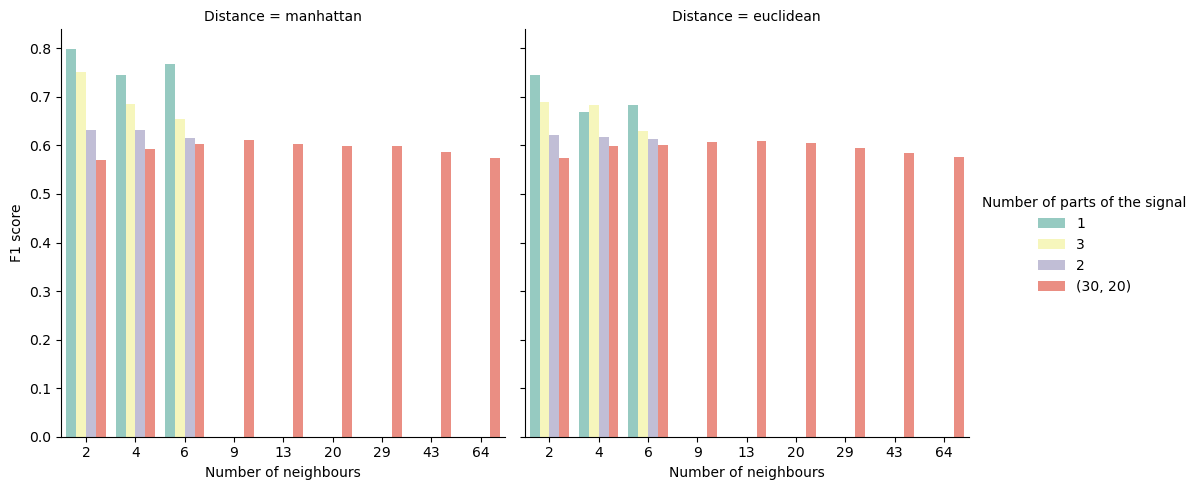

In [13]:
palette = sns.set_palette('Set3', n_colors=4)
sns.catplot(data=df_v1,x='Number of neighbours', y='F1 score', col='Distance',hue='Number of parts of the signal', kind='bar', palette=palette)
plt.show()


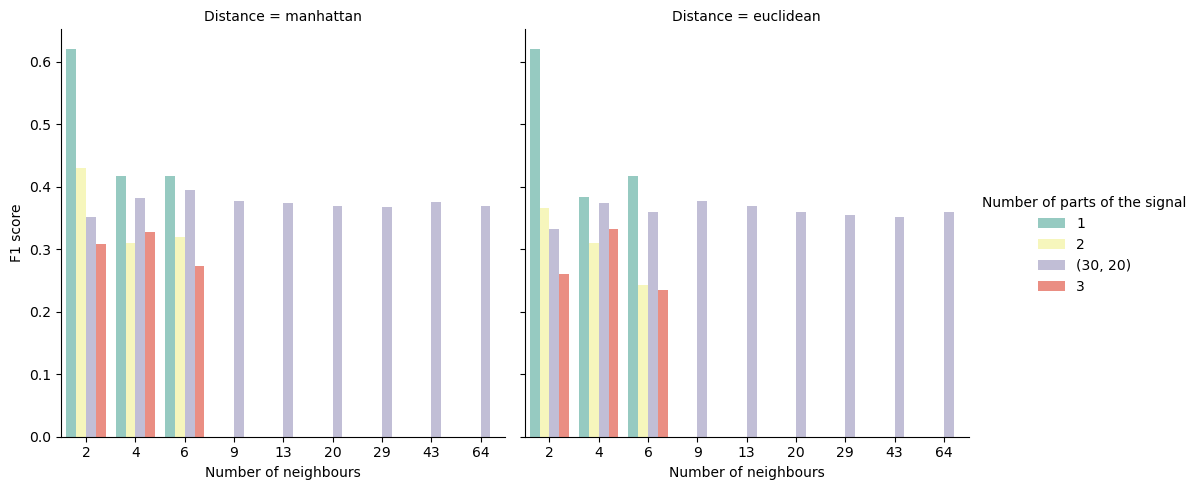

In [14]:
sns.catplot(data=df_v2,x='Number of neighbours', y='F1 score', col='Distance',hue='Number of parts of the signal', kind='bar', palette=palette)
plt.show()
